In [34]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import pickle

import random
import time

%matplotlib notebook

In [4]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [5]:
with open('./data/' + 'pull' + '_object_poses_tip_2.pkl', 'rb') as f:
    data = pickle.load(f)

object_poses_palm = data['object_pose_palm']
palm_poses_world = data['palm_pose_world']
contact_bool = data['contact_bool']
object_poses_world = []

In [6]:
print(len(object_poses_palm))

540


In [ ]:
pose = object_poses_palm[i]
euler = R.from_quat(pose[3:]).as_euler('xyz')
for i, pose in enumerate(object_poses_palm):
    euler = R.from_quat(pose[3:]).as_euler('xyz')
    if contact_bool[i]:
            print(euler)

<IPython.core.display.Javascript object>


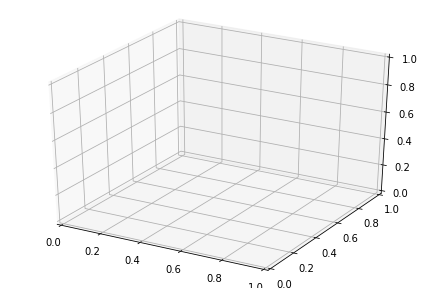

<IPython.core.display.Javascript object>


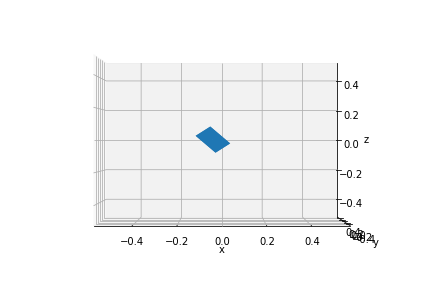

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


In [41]:
# # Create a new plot
figure = pyplot.figure()
# plt.show()
axes = mplot3d.Axes3D(figure)

your_mesh = mesh.Mesh.from_file('meshes/realsense_box_experiments.stl')
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

collection = mplot3d.art3d.Poly3DCollection(your_mesh.vectors)
axes.add_collection3d(collection)

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)*7
axes.auto_scale_xyz(scale, scale, scale)

axes.view_init(0, -90)

plt.ion()
plt.show()

def update(i):
    your_mesh = mesh.Mesh.from_file('meshes/realsense_box_experiments.stl')

    pose = object_poses_palm[i]
    euler = R.from_quat(pose[3:]).as_euler('xyz')    
    if contact_bool[i]:
    #         print(euler)
        your_mesh.translate([pose[0], pose[1], pose[2]])
        your_mesh.rotate([1, 0, 0], euler[0])
        your_mesh.rotate([0, 1, 0], euler[1])
        your_mesh.rotate([0, 0, 1], euler[2])
        collection.set_verts(your_mesh.vectors)
            
ani= matplotlib.animation.FuncAnimation(plt.gcf(), update, frames=540,
                                       interval=100, repeat=False)

plt.show()